## 5.1 Statistics Intro

Apply basic statistics to a Pandas dataframe

### 5.11 Set up the Environment

In [2]:
# load libraries
import pandas
import numpy

# magic method to allow inline plotting
%pylab inline

# set Pandas display options
pandas.set_option('display.max_rows', 20)

Populating the interactive namespace from numpy and matplotlib


### 5.12 Read the dataset

In [3]:
# load the data
url = 'https://raw.github.com/alfredessa/pdacookbook/master/data/auto.csv'

auto = pandas.read_csv(url)

In [4]:
# verify data

auto.head()

,make,price,mpg,repairs,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
1,AMC,4749,17,3,3350,173,0
2,AMC,3799,22,3,2640,168,0
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1


### 5.13 Basic Statistics and Visualizations

In [5]:
# the `describe()` method provides basic statistics: min, max, count, mean, stdev, IQR

auto.describe()

,price,mpg,repairs,weight,length,foreign
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6651.730769,20.923077,3.269231,3099.230769,190.076923,0.269231
std,3371.119809,4.757504,0.777570,695.079409,18.170136,0.452344
min,3299.000000,14.000000,2.000000,2020.000000,163.000000,0.000000
25%,4465.750000,17.250000,3.000000,2642.500000,173.250000,0.000000
50%,5146.500000,21.000000,3.000000,3200.000000,191.000000,0.000000
75%,8053.500000,23.000000,4.000000,3610.000000,203.000000,0.750000
max,15906.000000,35.000000,5.000000,4330.000000,222.000000,1.000000


In [6]:
# describe a single column

auto.mpg.describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
dtype: float64

In [8]:
# if a column name contains spaces, the attribute notation also works

auto['mpg'].describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
dtype: float64

In [9]:
# median is also available through `median()`

auto.mpg.median()

21.0

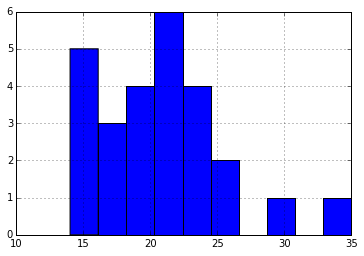

In [10]:
# plot a histogram

auto.mpg.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f1922862cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f192286eb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f192287ae90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f192287a850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1922862e50>,
  <matplotlib.lines.Line2D at 0x7f192286e550>]}

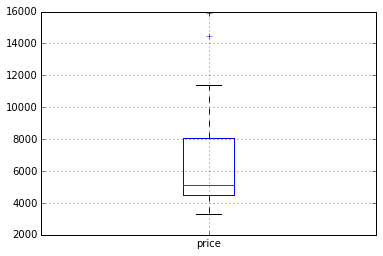

In [15]:
# make a box plot

# to hide the readout, use: return_type='axes'
auto.boxplot(column='price', return_type='dict')

### 5.14 Groupby

In [16]:
# load data
url = 'https://raw.github.com/alfredessa/pdacookbook/master/data/titanic.csv'

titanic = pandas.read_csv(url)

In [17]:
# verify df

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [18]:
# show basic statistics

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


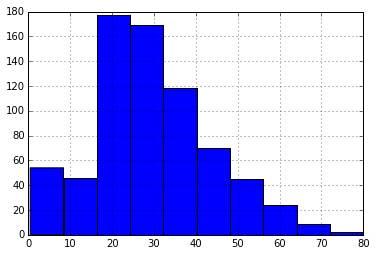

In [19]:
# make a histogram

titanic.Age.hist()

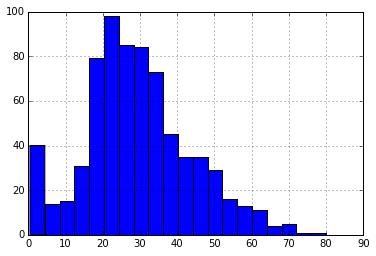

In [20]:
# change the number of bins

titanic.Age.hist(bins=20)

In [21]:
# group data into 'men' and 'women' for comparison

# use `groupby()`
grouped = titanic.groupby('Sex')

In [24]:
# verify group
for k, group in grouped:
    print k
    print group.head()

female
   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  
m

In [25]:
# check the median

grouped.Age.median()

Sex
female    27
male      29
Name: Age, dtype: float64

In [26]:
# see a summary of statistics

grouped.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
Sex                                                                         
female count   314.000000  314.000000  314.000000  261.000000  314.000000   
       mean    431.028662    0.742038    2.159236   27.915709    0.694268   
       std     256.846324    0.438211    0.857290   14.110146    1.156520   
       min       2.000000    0.000000    1.000000    0.750000    0.000000   
       25%     231.750000    0.000000    1.000000   18.000000    0.000000   
       50%     414.500000    1.000000    2.000000   27.000000    0.000000   
       75%     641.250000    1.000000    3.000000   37.000000    1.000000   
       max     889.000000    1.000000    3.000000   63.000000    8.000000   
male   count   577.000000  577.000000  577.000000  453.000000  577.000000   
       mean    454.147314    0.188908    2.389948   30.726645    0.429809   
       std     257.486139    0.391775    0.813580   14.678201    1.061811   
       min       1.000000    0.000000    1.000000    0.420000    0.000000   
       25%     222.000000    0.000000    2.000000   21.000000    0.000000   
       50%     464.000000    0.000000    3.000000   29.000000    0.000000   
       75%     680.000000    0.000000    3.000000   39.000000    0.000000   
       max     891.000000    1.000000    3.000000   80.000000    8.000000   

                   Parch        Fare  
Sex                                   
female count  314.000000  314.000000  
       mean     0.649682   44.479818  
       std      1.022846   57.997698  
       min      0.000000    6.750000  
       25%      0.000000   12.071875  
       50%      0.000000   23.000000  
       75%      1.000000   55.000000  
       max      6.000000  512.329200  
male   count  577.000000  577.000000  
       mean     0.235702   25.523893  
       std      0.612294   43.138263  
       min      0.000000    0.000000  
       25%      0.000000    7.895800  
       50%      0.000000   10.500000  
       75%      0.000000   26.550000  
       max      5.000000  512.329200

In [27]:
# summarize age

grouped.Age.describe()

Sex          
female  count    261.000000
        mean      27.915709
        std       14.110146
        min        0.750000
        25%       18.000000
        50%       27.000000
        75%       37.000000
        max       63.000000
male    count    453.000000
        mean      30.726645
        std       14.678201
        min        0.420000
        25%       21.000000
        50%       29.000000
        75%       39.000000
        max       80.000000
dtype: float64

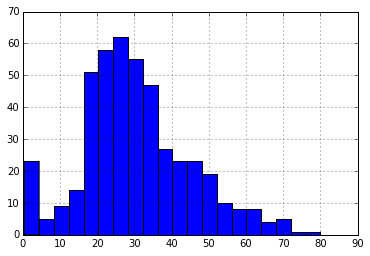

In [29]:
# access the Age column for men, then histogram it

grouped.get_group('male').Age.hist(bins=20)

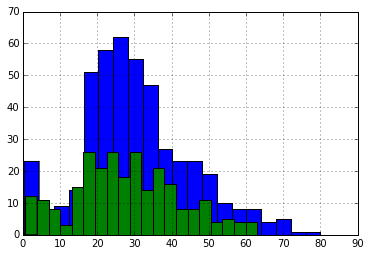

In [30]:
# access the Age columns, then overlay histograms

grouped.get_group('male'  ).Age.hist(bins=20)
grouped.get_group('female').Age.hist(bins=20)

OrderedDict([('female', {'boxes': [<matplotlib.lines.Line2D object at 0x7f1922138fd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f19220ccb10>], 'medians': [<matplotlib.lines.Line2D object at 0x7f19220cc4d0>], 'means': [], 'whiskers': [<matplotlib.lines.Line2D object at 0x7f1922140290>, <matplotlib.lines.Line2D object at 0x7f1922140950>], 'caps': [<matplotlib.lines.Line2D object at 0x7f1922140f90>, <matplotlib.lines.Line2D object at 0x7f192212e9d0>]}), ('male', {'boxes': [<matplotlib.lines.Line2D object at 0x7f19220d5a90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f192214b650>], 'medians': [<matplotlib.lines.Line2D object at 0x7f1922155950>], 'means': [], 'whiskers': [<matplotlib.lines.Line2D object at 0x7f19220d5d10>, <matplotlib.lines.Line2D object at 0x7f1922138bd0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f192212e2d0>, <matplotlib.lines.Line2D object at 0x7f192215fc90>]})])

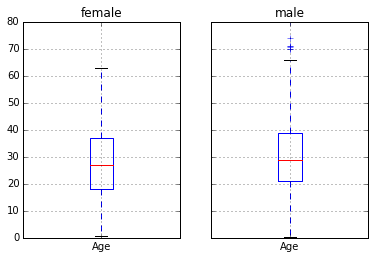

In [31]:
# access the age columns and make a pair of boxplots

grouped.boxplot(column='Age', return_type='dict')